In [1]:
# Loading-in our data!
import torchvision


# downloading 50k image net samples.
data = torchvision.datasets.Imagenette(
    root = "imagenette_download",
    split = "train",
    download=False
)

In [2]:
# using our extractor.
from dataloader import raw_images_convert
from dataloader import save_raw_labels

# saving all of our labels and images so
# they are acessible by model
raw_images_convert(data,'raw_images','jpeg') 
save_raw_labels(data,"label_folder","all")

# now, we can delete the real images, but keep for now.

Path exists, process skipped
saved at  label_folder\labels.csv


'Yay!'

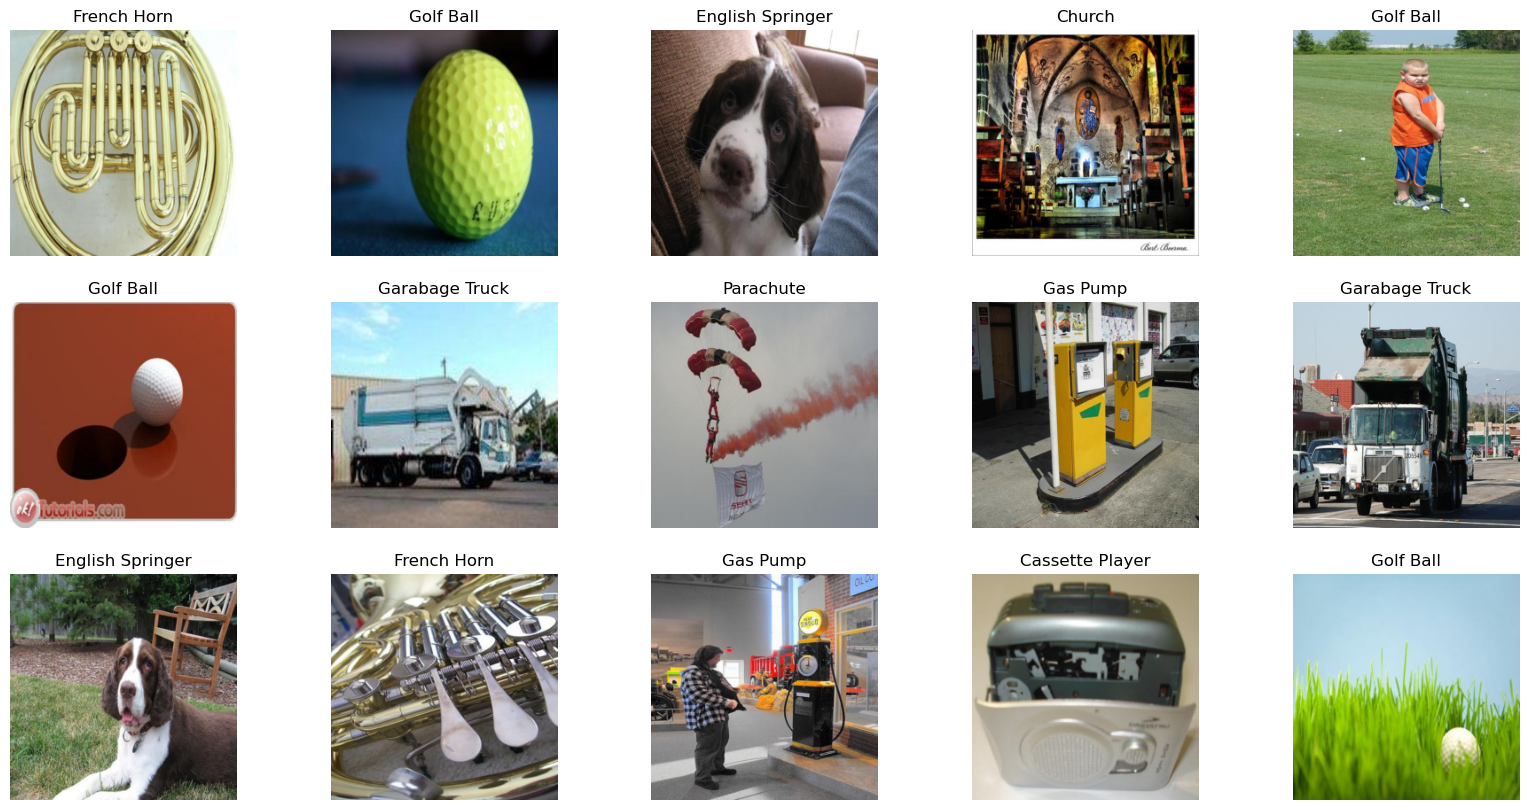

In [13]:
# making sure everything worked: saving into custom-dataset
from dataloader import ImageDataset
import matplotlib.pyplot as plt
import torch 
label_map = {
    0:"Tench",
    1:"English Springer",
    2: "Cassette Player",
    3:"Chain Saw",
    4:"Church",
    5:"French Horn",
    6:"Garabage Truck",
    7:"Gas Pump",
    8:"Golf Ball",
    9:"Parachute"
}

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize([256,256]),
    torchvision.transforms.ToTensor()
])
custom_data = ImageDataset(transform,'raw_images',"label_folder","jpeg",False,None)

fig, axes = plt.subplots(3,5)
fig.set_size_inches(20,10)
for i in range(15):
    ind = torch.randint(0,len(custom_data),size=(1,)).item()
    axes[i // 5][i%5].imshow(custom_data[ind][0].permute(1,2,0))
    axes[i // 5][i%5].set_title(label_map[custom_data[ind][1]])
    axes[i // 5][i%5].set_axis_off()


'Yay!'

In [ ]:
# now, we need to create our latent-model
from VAE import # LATENT-MODEL
from make_latents import store_latents

store_latents(data,'latent_storage',#LATENT_MODEL)